In [1]:
%load_ext autoreload
%autoreload 2

# Starter Notebook

Use this notebook as a reference point for using the library.

Important Note:
- This notebook is an adaptation of the concepts discussed in this [Kaggle notebook](https://www.kaggle.com/code/arnabchaki/eda-on-data-science-salaries). The same ideas have been implemented using the code-genie library.
- We have intentionally skipped a lot of documentation/notes in the previous notebook because code-genie obviates the need for documentation given the text based inputs.

## setup access token

Don't have an access token yet? [Sign up for free!](https://www.thismlguy.com/)

Store your access token in a `.env` file with the same format as shown in the [.env.example file](https://github.com/thismlguy/code-genie/blob/main/docs/notebooks/.env.example)

In [2]:
from dotenv import load_dotenv

In [3]:
load_dotenv(".env")  # replace with path to your env file

True

We're using dotenv library here, alternatively you can simply set the environment variable as:
```
import os
os.environ["CODE_GENIE_TOKEN"] = "your-access-token-here"
```

Though it is not recommended to do so as notebooks are typically shared with others and you should keep your access token private.

## Note on Privacy & Security

Privacy of your data is of primte importance. This library has been specifically designed to NOT share any part of your data with the Genie APIs. Just the metadata about your data like name and types of columns of a pandas dataframe would be shared, which help in generating high quality results.

## setup cache

By default the package will cache genie invocations in a temp file. This would mean that any genies created will be lost once you restart the kernel or rerun the notebook at another time. to keep the cached genies, you can set a custom path where genies would be stored so that you will not lose them when you rerun the notebook.

You can modify the cached code if you'd like and those modifications would be loaded the next time you run the code.

In [4]:
CACHE_DIR = "./_cache_starter"

## Load data

We'll be using the [Data Science Salaries 2023](https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023) dataset for this analysis.

In [5]:
import opendatasets as od
from tempfile import mkdtemp
import pandas as pd

In [6]:
data_dir = mkdtemp()
od.download("https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023", data_dir=data_dir)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  aarshayjain


Your Kaggle Key:

  ········


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25.4k/25.4k [00:00<00:00, 11.1MB/s]

In [8]:
df = pd.read_csv(f"{data_dir}/data-science-salaries-2023/ds_salaries.csv")
df.shape

(3755, 11)

In [9]:
df.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S


## Initialize genie on the data

In [10]:
from code_genie import Genie

In [11]:
# create genie instance on this df
genie = Genie(data=df, cache_dir=CACHE_DIR)

## Understanding the output

### find number of missing values in each column

Let's the store the output in a variable called `gr_miss`. This will have various attributes, details of which you can find in [this documentation](https://code-genie.readthedocs.io/en/latest/api.html).

In [12]:
gr_miss = genie.plz("find number of missing values in each column")

Loading cached genie id: count_missing_values_26226, set override = True to rerun


The result attrbite can be used to access the result.

In [13]:
gr_miss.result

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

The code attribute gives you the exact code used to generate the output.

In [14]:
print(gr_miss.code)

import pandas as pd

def count_missing_values(df):
    return df.isnull().sum()



In case of simple computations like this where you don't wanna look at the code, you could just add `.result` at the end of invocation to directly print result to stdout.

In [15]:
genie.plz("find number of missing values in each column").result

Loading cached genie id: count_missing_values_26226, set override = True to rerun


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## drop unnecessary columns

Note that in the statement below, we are giving 2 independent instructions, hence we're sending a list of instructions and not just a single string.

In [16]:
gr_drop = genie.plz(["return df with salary and salary_currency columns dropped",
                     "rename salary_in_usd column to salary"],
                    update_base_input=True)

Loading cached genie id: process_dataframe_88292, set override = True to rerun


In [17]:
genie.data.head(2)

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S


We see that the 2 columns are dropped. Note that the df within the genie has been modified as we passed the `update_base_input="df"` argument to plz. This should not be passed if you don't want to overwrite the base input.

# Handling categorical variables

Taking up a couple of features from the [base analysis](https://www.kaggle.com/code/arnabchaki/eda-on-data-science-salaries) as an example here.

### Experience Level

In [18]:
genie.plz("print unique value counts of experience level").result

Loading cached genie id: unique_experience_count_96626, set override = True to rerun
SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64


In [19]:
gr_exp_mod = genie.plz("""return a df with values replaced in experience_level column using following mapping:
- EN: Entry-level / Junior
- MI: Mid-level / Intermediate
- SE: Senior-level / Expert
- EX: Executive-level / Director.
""", update_base_input=True)

Loading cached genie id: map_experience_level_48687, set override = True to rerun


In [20]:
genie.plz("print unique value counts of experience level").result

Loading cached genie id: unique_experience_count_96626, set override = True to rerun
Senior-level / Expert         2516
Mid-level / Intermediate       805
Entry-level / Junior           320
Executive-level / Director     114
Name: experience_level, dtype: int64


### Job Designation

In [21]:
genie.plz("how many distinct kinds of job designations are there?").result

Loading cached genie id: count_job_designations_83350, set override = True to rerun


93

Loading cached genie id: top_jobs_41202, set override = True to rerun


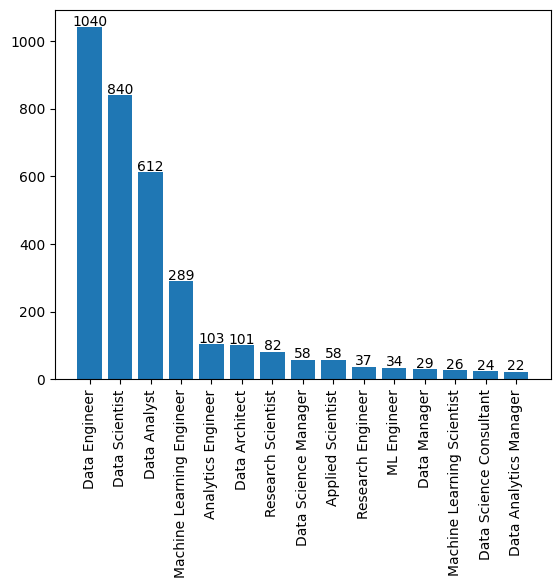

In [22]:
genie.plz(["get top 15 most frequently occuring job designations",
           "make a bar chart of these designations along with count",
           "rotate labels of bar chart 90 degrees",
           "print the count on top of each bar"]).result

Loading cached genie id: make_wordcloud_51022, set override = True to rerun


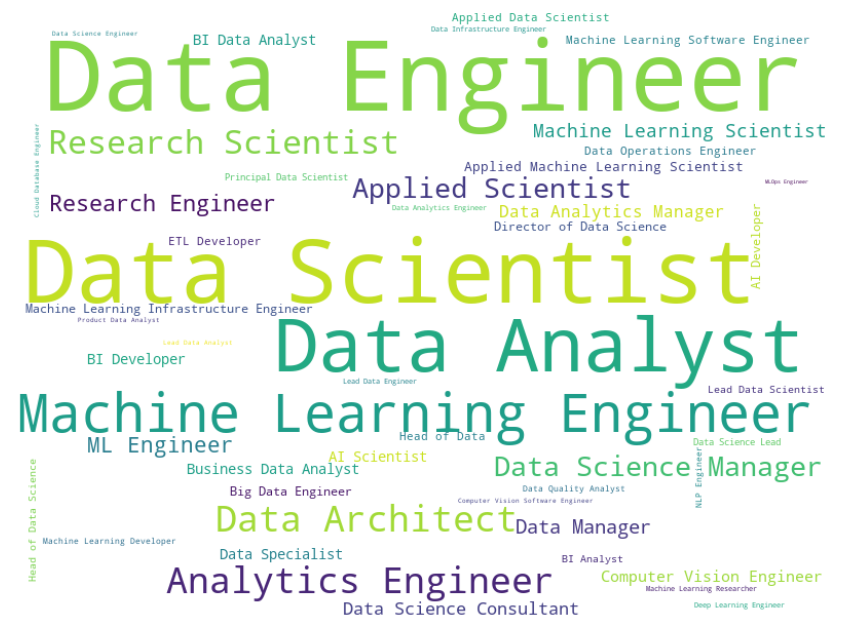

In [23]:
gr_word_cloud = genie.plz(["make a word cloud of job title using frequency of occurence of the job title as size of word",
                           "main words should appear horizontal"])

# Handling Numerical Data

Loading cached genie id: pie_chart_47446, set override = True to rerun


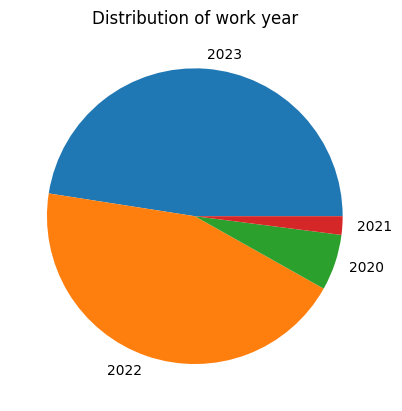

In [24]:
genie.plz("make a pie chart showing distribution of work year").result

Loading cached genie id: create_boxplot_24032, set override = True to rerun


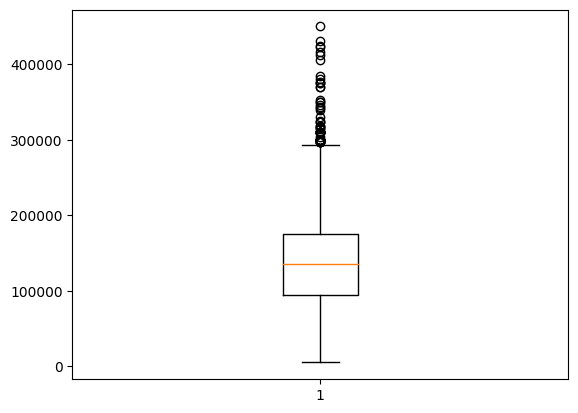

In [25]:
genie.plz("make a boxplot of the salary").result

In [26]:
gr_remote_mod = genie.plz("""return a df with values replaced in remote_ratio column using following mapping:
- 0: No Remote Work
- 50: Partially Remote
- 100: Fully Remote
""", update_base_input="df")

Loading cached genie id: remote_ratio_mapper_69067, set override = True to rerun


In [27]:
genie.plz("print unique value counts of remote ratio").result

Loading cached genie id: unique_remote_ratio_counts_63145, set override = True to rerun
No Remote Work      1923
Fully Remote        1643
Partially Remote     189
Name: remote_ratio, dtype: int64


## Remote work by work year

Loading cached genie id: remote_ratio_by_work_years_96078, set override = True to rerun


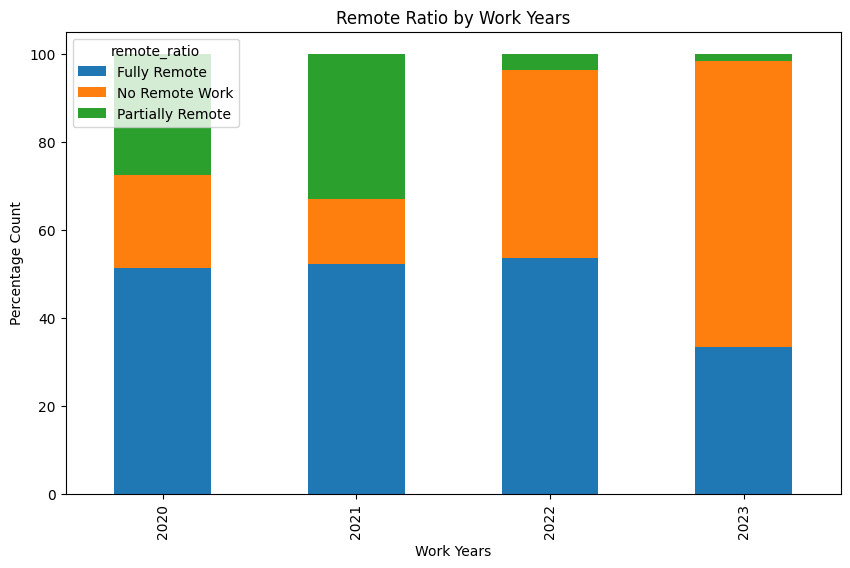

In [31]:
genie.plz("make a bar chart of percentage counts of remote_ratio grouped by work_years.").result

We can see that remote work was highe during the years of 2020-2022 and has come down in 2023.

## Experience Level Analysis

Loading cached genie id: plot_emp_type_experience_level_31165, set override = True to rerun


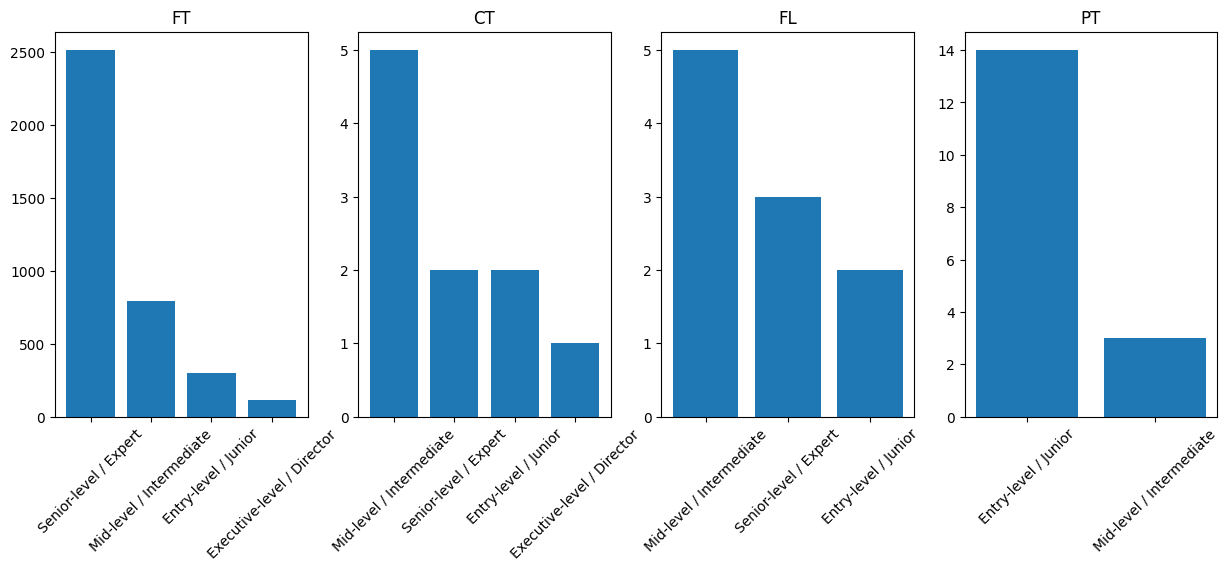

In [32]:
genie.plz(["make a grid of charts, one for each employment_type; ",
           "each chart should have a bar plot with the counts of experience_level",
           "rotate labels of all charts by 45 degress",
           "all plots should in a single row"]).result

## Salary Analysis

Loading cached genie id: plot_salary_distribution_51861, set override = True to rerun


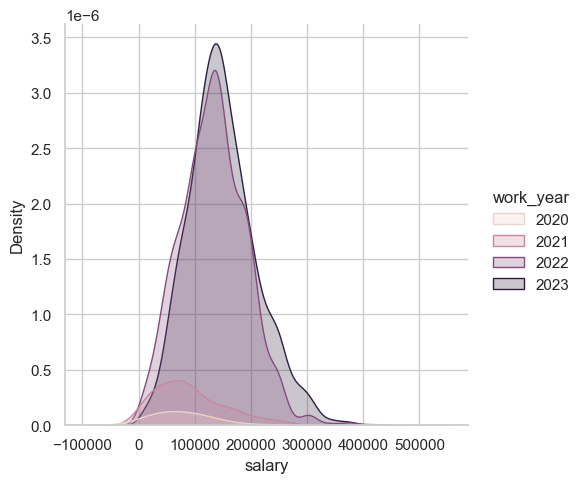

In [33]:
genie.plz(["plot the distribution of salary, grouped by work_year",
           "use lines to represent distribution"]).result

# Important Notes

- Getting to the right prompt could take a couple of attempts. use `override=True` argument to re-generate a cached code segment
- Sometimes the code generated might throw an error. There are 2 major types of errors:
    - `ModuleNotFoundError`: this is in case when a library is being used by the code which is not present in your current environment. You could install that library.
    - Other erros: you could re-generate the code using `override=True` argument
- Modify generated code
    - You might want to make slight modifications to the generated code, you could do that by going into the cached file and making changes. Next time you run the same prompt, the cached file with your changes will be loaded. Note that if you either change the prompt or set override=True, your changes will be lost.